In [1]:
import numpy as np
import h5py
from copy import deepcopy
import os, zipfile, shutil,gzip
import pandas as pd
import glob
from scipy.stats import linregress
import os
from datetime import datetime
from datetime import timedelta
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
import scipy
from numpy import polyfit, poly1d
from scipy import interpolate
import matplotlib as mpl
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import time
from tqdm import tqdm
import math
import plotly
from plotly import graph_objs as go
from plotly.subplots import make_subplots

secret='TD.a-ZsKkoLFWpWQpFK.dejlvOF7NK0XBVM.LlD63gOWm7VaNIu.WzC3t3XtgjavrVM.PxZSkA5B3pBRC2T.baP4'
import nest_asyncio
nest_asyncio.apply()
from tardis_dev import datasets

if not sys.warnoptions:
    warnings.simplefilter("ignore")

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
df = pd.read_csv(r'Y:\Trade Pro\data_wei\kraken\dist\ATOM-EUR_sell_dist.gz')

In [11]:
df.sort_values('time')

,Unnamed: 0,time,dist,sum,fp,amount2dollar
0,0,2023-10-15 08:23:16,-0.000507,139.846428,6.245834,6.561280
1,1,2023-10-15 08:23:18,-0.000274,108.752737,6.243692,6.559061
2,2,2023-10-15 08:37:17,-0.000103,324.640200,6.237356,6.552404
3,3,2023-10-15 08:38:44,0.000562,623.826664,6.236404,6.551373
4,4,2023-10-15 11:54:12,-0.000432,14.354832,6.258595,6.575593
...,...,...,...,...,...,...
19560,19560,2023-12-08 23:51:02,-0.007689,59.800276,9.642370,10.458693
19561,19561,2023-12-08 23:51:47,-0.008591,872.189144,9.620692,10.435180
19562,19562,2023-12-08 23:53:29,-0.007119,886.245152,9.589790,10.401662
19563,19563,2023-12-08 23:53:47,-0.007794,108.466000,9.582818,10.394099


In [18]:
for name in os.listdir(r'C:\Users\杜威\Desktop\tardis\premium\XBT-EUR'):
    df=pd.read_csv(f'C:/Users/杜威/Desktop/tardis/premium/XBT-EUR/{name}')
    if not df[df.time>='2022-10-17 15:18:00'][df.time<='2022-10-17 15:19:00'].empty:
        print(name)

2022-10-17.gz
2022-11-08.gz


In [2]:
name='2022-11-29.gz'
df=pd.read_csv(f'C:/Users/杜威/Desktop/tardis/premium/XBT-EUR/{name}')

In [5]:
df.sort_values(by='bid_depth').head(20)

,Unnamed: 0,ask_depth,bid_depth,time
43124,43124,11004118,144,2022-11-29 19:59:31
35193,35193,9406371,144,2022-11-29 17:47:04
35192,35192,9412736,144,2022-11-29 17:47:03
35191,35191,9413744,144,2022-11-29 17:47:02
35190,35190,9397734,144,2022-11-29 17:47:01
35189,35189,9466455,144,2022-11-29 17:47:00
35188,35188,9466455,144,2022-11-29 17:46:59
35187,35187,9479034,144,2022-11-29 17:46:58
35186,35186,9556611,144,2022-11-29 17:46:57
35185,35185,9549510,144,2022-11-29 17:46:56


In [12]:
df['time'][26235]=='2022-10-17 15:18:00'

True

In [7]:
df =pd.read_csv(r'C:\Users\杜威\Desktop\datasets\kraken_book_snapshot_5_2023-02-11_USDC-USD.csv.gz',usecols=['timestamp','asks[0].price','bids[0].price'])
f_gettime = lambda x: datetime.fromtimestamp((x) / 1000000)  ##get datatime_type
df['time_ms'] = df.timestamp.map(f_gettime)
td=df[df['time_ms']>='2023-02-11 16:55:30']
#td[td['time_ms']<'2023-01-04 15:24:59'][['time_ms','bids[0].price','asks[0].price']].to_csv(r'C:\Users\杜威\Desktop\USDCAD_5level.csv')
#td[td['time_ms']<'2022-11-09 03:33:07'][['time_ms','bids[0].price']]

In [11]:
td

,timestamp,price_buy,price_sell,amount_buy,amount_sell,time_ms,time_m
0,1668902401513803,NaN,0.9999,NaN,-597.480657,2022-11-20 08:00:01.513803,2022-11-20 08:00:00
1,1668902401513977,NaN,0.9999,NaN,-1400.000000,2022-11-20 08:00:01.513977,2022-11-20 08:00:00
2,1668902401557423,NaN,0.9999,NaN,-9000.900090,2022-11-20 08:00:01.557423,2022-11-20 08:00:00
3,1668902402749414,NaN,0.9999,NaN,-9000.900090,2022-11-20 08:00:02.749414,2022-11-20 08:00:00
4,1668902403748825,NaN,0.9999,NaN,-9000.900090,2022-11-20 08:00:03.748825,2022-11-20 08:00:00
...,...,...,...,...,...,...,...
520598,1677109962972329,1.0,NaN,7.999815,NaN,2023-02-23 07:52:42.972329,2023-02-23 07:52:00
520599,1677109963388339,1.0,NaN,50.837140,NaN,2023-02-23 07:52:43.388339,2023-02-23 07:52:00
520600,1677110306606468,NaN,0.9999,NaN,-204.970497,2023-02-23 07:58:26.606468,2023-02-23 07:58:00
520601,1677110334697034,NaN,0.9999,NaN,-1250.000000,2023-02-23 07:58:54.697034,2023-02-23 07:58:00


In [9]:
df=[]
for name in os.listdir(r'C:\Users\杜威\Desktop\datasets'):
    if 'USDC-USD' in name and 'snap' in name:
        df0=pd.read_csv(f'C:/Users/杜威/Desktop/datasets/{name}',usecols=['timestamp','asks[0].price','bids[0].price'])
        df.append(df0)
df=pd.concat(df)
f_gettime = lambda x: datetime.fromtimestamp((x) / 1000000)  ##get datatime_type
df['time_ms'] = df.timestamp.map(f_gettime)
df['time_m']=df.time_ms.astype('datetime64[m]')
df=df.rename(columns={"asks[0].price":"askp1","bids[0].price":"bidp1"})

In [10]:
td=[]
for name in os.listdir(r'C:\Users\杜威\Desktop\datasets'):
    if 'USDC-USD' in name and 'trades' in name:
        df0=pd.read_csv(f'C:/Users/杜威/Desktop/datasets/{name}',usecols=['timestamp','side','price','amount'])
        td.append(df0)
td=pd.concat(td)
td.index=td.timestamp
td=td.pivot(index='timestamp',columns='side',values=['price','amount'])
rename_the_df=[]
for x in td.columns:
    rename_the_df.append("_".join(x))
td.columns=rename_the_df
td.reset_index(inplace=True)
f_gettime = lambda x: datetime.fromtimestamp((x) / 1000000)  ##get datatime_type
td['time_ms'] = td.timestamp.map(f_gettime)
td['time_m']=td.time_ms.astype('datetime64[m]')
td['amount_sell']*=-1

In [12]:
isout_time=df[(df["askp1"]<0.9999)+(df["bidp1"]>1)][["time_m"]].groupby(by='time_m',as_index=False).median()[['time_m']]

In [13]:
df_bar=pd.merge(df,isout_time,on='time_m',how='right')
df_trade=pd.merge(td,isout_time,on='time_m',how='right')

In [64]:
time_se=isout_time['time_m']
time_ls=[]
time=[time_se[0]]
for i in range(1,len(time_se)):
    if time_se[i]-time_se[i-1]>timedelta(hours=0.5):
        time_ls.append(time)
        time=[time_se[i]]
    else:
        time.append(time_se[i])

In [68]:
def bartrade_plot(df1,df2,time_ls):          
    y={
        'askp1':'lines',
        'bidp1':'lines',
        'price_buy':'markers',
        'price_sell':'markers'
    }
    yd={
        'amount_buy':'bar',
        'amount_sell':'bar'
    }
    path=f'C:/Users/杜威/Desktop/tardis/premium/plot/USDC-USD'
    if not os.path.exists(path):
        os.mkdir(path)
    os.chdir(path)
    for time in time_ls:
        begin=time[0]
        end=time[-1]+timedelta(minutes=1)
        df3=df1[df1['time_ms']>=begin][df1['time_ms']<=end]
        df4=df2[df2['time_ms']>=begin][df2['time_ms']<=end]
        begin=str(begin).replace(' ','_').replace(':','-')
        outrange_plot(df3,df4,
                y,yd=yd,
                output_name=f'{begin}')

In [69]:
bartrade_plot(df_bar,df_trade,time_ls)

In [47]:
def add_lines3(fig, df1,df2,cols_plot,**kwargs):
    """Add lines to fig with given y_plot"""
    for col in cols_plot:
        marker={}
        if 'buy' in col:
            marker['color'] = 'red'
        elif 'ask' in col:
            marker['color'] = 'pink'
        elif 'sell' in col:
            marker['color'] = 'green'
        elif 'bid' in col:
            marker['color'] = 'cyan'
        if cols_plot[col] == 'bar':
            marker2=deepcopy(marker)
            marker2['opacity']=0.3
            fig.add_trace(
                go.Bar(
                    name=col+'_m',
                    x=df2.time_ms,
                    y=df2[col],
                    marker=marker,
                ),
                **kwargs
            )
        elif 'price' in col:
            marker['size']=1
            fig.add_trace(
                go.Scatter(
                    name=col,
                    x=df2.time_ms,
                    y=df2[col],
                    mode=cols_plot[col],
                    marker=marker,
                ),
                **kwargs
            )
        else:
            marker['size']=2
            fig.add_trace(
                go.Scatter(
                    name=col,
                    x=df1.time_ms,
                    y=df1[col],
                    mode=cols_plot[col],
                    marker=marker,
                ),
                **kwargs
            )
        fig.update_layout(barmode='relative')

def outrange_plot(df1,df2,
            y, y2=(), yd=(), yd2=(),
             output_html=True, output_name='plot.html', auto_open=False):
    
    fig = make_subplots(
        rows=2, cols=1, row_heights=(1,0.75),
        shared_xaxes=True, vertical_spacing=0.01,
        specs=[[{"secondary_y": True}], [{"secondary_y": True}]]
    )
    add_lines3(fig, df1,df2, y, row=1, col=1, secondary_y=False)
    add_lines3(fig, df1,df2, yd,row=2, col=1, secondary_y=False)
    
    
    if output_html:
        plotly.offline.plot(fig, filename=output_name,auto_open=auto_open)
    else:
        fig.show()

In [19]:
import sys
sys.path.append(r"C:\Users\杜威\Desktop\市价单成交概率\tools")
import plot_toolbox as ptb

In [129]:
def add_lines(fig, df,cols_plot,coin_lis,**kwargs):
    """Add lines to fig with given y_plot"""
    for col in cols_plot:
        marker={}
        """if 'buy' in col:
            marker['color']='red'
        elif 'sell' in col:
            marker['color']='green'"""
        if cols_plot[col]=='bar':
            for coin in coin_lis:
                fig.add_trace(
                    go.Bar(
                        name=col+'_min'+'_'+coin,
                        x=df[df['coin']==coin].index,
                        y=df[df['coin']==coin][col],
                        marker=marker,
                    ),
                    **kwargs
                )
        else:
            marker['size']=3
            for coin in coin_lis:
                fig.add_trace(
                    go.Scatter(
                        name=col+'_'+coin,
                        x=df[df['coin']==coin].index,
                        y=df[df['coin']==coin][col],
                        mode=cols_plot[col],
                        marker=marker,
                    ),
                    **kwargs
                )
        fig.update_layout(barmode='relative')
        fig.update_layout(bargap=0,
                         bargroupgap=0)

def df_plot(df,coin_lis,
            y, y2=(), yd=(), yd2=(),
             output_html=True, output_name='plot.html',
             is_dismiss_no_trading_time=True, lunch_time=(11.5, 13),auto_open=False):
    
    fig = make_subplots(
        rows=2, cols=1, row_heights=(1,0.75),
        shared_xaxes=True, vertical_spacing=0.01,
        specs=[[{"secondary_y": True}], [{"secondary_y": True}]]
    )

    add_lines(fig, df, y, coin_lis,row=2, col=1, secondary_y=False)
    add_lines(fig, df, y2, coin_lis,row=1, col=1, secondary_y=True)
    #add_lines(fig, df, yd, coin_lis,row=2, col=1, secondary_y=False)
    add_lines(fig, df, yd2,coin_lis, row=2, col=1, secondary_y=True)

    if is_dismiss_no_trading_time:
        fig.update_xaxes(
            rangebreaks=[
                dict(bounds=lunch_time, pattern="hour")
            ]  # hide dates with no values
        )

    if output_html:
        plotly.offline.plot(fig, filename=output_name,auto_open=auto_open)
    else:
        fig.show()
        
def get_premium_plot(ib_coin,i,coin_lis):
    td=[]
    for coin in coin_lis:
        if td_map[coin]==2:
            coin_0=coin[:-4].lower()
        else:
            coin_0=coin
        name_lis=os.listdir(f'C:/Users/杜威/Desktop/tardis/premium/bar_merge_ib/{ib_coin}/{coin_0}')
        for name in name_lis[10*i:10*(i+1)]:
            date=name[-14:-4]
            df,td_ms=get_ch_td(date,coin,'00:00:00','23:59:59')
            td_bar,td_bar_ms,td_bar_m=td_merge_bar(df,td_ms,ib_coin,coin,date,td_map[coin])
            td_bar_m['coin']=coin
        
            td.append(td_bar_m)
    td=pd.concat(td, axis=0, ignore_index=True)
               
    y={
        'premium':'lines'
    }
    yd={
        'amount_buy':'bar',
        'amount_sell':'bar'
    }
    td.index=td.time_m
    path=f'C:/Users/杜威/Desktop/tardis/premium/plot/{ib_coin}/{ib_coin}_premium'
    if not os.path.exists(path):
        os.mkdir(path)
    os.chdir(path)
    df_plot(td,coin_lis,
            y,yd=yd,
            output_name=f'{ib_coin}_premium_{i}.html')

In [26]:
coin_lis=['USD-CAD','USDT-CAD','XBT-CAD']
for i in range(10):
    get_premium_plot('USDCAD',i,coin_lis)

In [8]:
for name in os.listdir(f'C:/Users/杜威/Desktop/tardis/premium/bar_merge_ib/eurusd')[35:]:
    size=os.path.getsize(f'C:/Users/杜威/Desktop/tardis/premium/bar_merge_ib/eurusd/{name}')
    if size>2000:
        get_premium_plot(name)

In [117]:
def get_df(name):
    df=pd.read_csv(f'C:/Users/杜威/Desktop/tardis/premium/bar_merge_ib/eurusd/{name}')
    df[f'premium{name[-9:]}']=df['mp']/df['FXP']-1
    df=df[['time',f'premium{name[-9:]}']]
    df['time'] = df['time'].astype('datetime64[m]')
    df=df.groupby('time').mean().reset_index()
    func=lambda x:str(x)[-8:]
    df['time']=df['time'].map(func)
    return df
df=get_df(os.listdir(f'C:/Users/杜威/Desktop/tardis/premium/bar_merge_ib/eurusd')[0])
for name in os.listdir(f'C:/Users/杜威/Desktop/tardis/premium/bar_merge_ib/eurusd')[1:]:
    df=df.merge(get_df(name),on='time',how='outer')
df['mean']=np.sum(df.iloc[:,1:76],axis=1)/(75-df.iloc[:,1:76].isna().sum(axis=1))
df=df.sort_values(by='time')
df['nan_num']=df.iloc[:,1:76].isna().sum(axis=1)
ptb.df_plot2(df, y=('mean'),yd=('nan_num'))

In [46]:
def add_lines2(fig, df, df_ms,cols_plot, **kwargs):
    """Add lines to fig with given y_plot"""
    for col in cols_plot:
        marker={}
        if 'buy' in col:
            marker['color']='red'
        elif  'ask' in col:
            marker['color']='pink'
        elif 'sell' in col:
            marker['color']='green'
        elif 'bid' in col:
            marker['color']='cyan'
        if cols_plot[col]=='bar':
            marker2=deepcopy(marker)
            marker2['opacity']=0.3
            fig.add_trace(
                go.Bar(
                    name=col+'_min',
                    x=df_ms.time_m,
                    y=df_ms[col],
                    marker=marker2
                ),
                **kwargs
            )
            marker['size']=3
            fig.add_trace(
                go.Scatter(
                    name=col+'_sec',
                    x=df.index,
                    y=df[col],
                    marker=marker,
                    mode='markers'
                ),
                **kwargs
            )
        elif 'price' in col:
            marker['size']=3
            fig.add_trace(
                go.Scatter(
                    name=col,
                    x=df_ms.time_ms,
                    y=df_ms[col],
                    mode=cols_plot[col],
                    marker=marker
                ),
                **kwargs
            )
        else:
            marker['size']=3
            fig.add_trace(
                go.Scatter(
                    name=col,
                    x=df.index,
                    y=df[col],
                    mode=cols_plot[col],
                    marker=marker
                ),
                **kwargs
            )
        fig.update_layout(barmode='relative')


def df_plot2(df,df_ms, df_m,y, y2=(), yd=(), yd2=(),yt=(),yt2=(),
             output_html=True, output_name='plot.html',
             is_dismiss_no_trading_time=False, lunch_time=(11.5, 13),auto_open=False):
    
    fig = make_subplots(
        rows=3, cols=1, row_heights=(0.25, 1,0.75),
        shared_xaxes=True, vertical_spacing=0.01,
        specs=[[{"secondary_y": True}], [{"secondary_y": True}], [{"secondary_y": True}]]
    )
    
    add_lines2(fig, df, df_ms, y, row=1, col=1, secondary_y=False)
    add_lines2(fig, df, df_ms, y2, row=1, col=1, secondary_y=True)
    add_lines2(fig, df, df_ms, yd, row=2, col=1, secondary_y=False)
    add_lines2(fig, df, df_ms, yd2, row=2, col=1, secondary_y=True)
    add_lines2(fig, df, df_m, yt, row=3, col=1, secondary_y=False)
    add_lines2(fig, df, df_m, yt2, row=3, col=1, secondary_y=True)

    if is_dismiss_no_trading_time:
        fig.update_xaxes(
            rangebreaks=[
                dict(bounds=lunch_time, pattern="hour")
            ]  # hide dates with no values
        )

    if output_html:
        plotly.offline.plot(fig, filename=output_name,auto_open=auto_open)
    else:
        fig.show()

def get_plotly(td,td_ms,td_m,date,ib_coin,coin):
    y={
        'premium':'lines'
    }
    yd={
        'askp1':'lines',
        'bidp1':'lines',
        'FXP':'lines',
        'price_buy':'markers',
        'price_sell':'markers'
    }
    yt={
        'amount_buy':'bar',
        'amount_sell':'bar'
    }
    td.index=td.time
    path=f'C:/Users/杜威/Desktop/tardis/premium/plot/{ib_coin}/{date}'
    if not os.path.exists(path):
        os.mkdir(path)
    os.chdir(path)
    df_plot2(td, td_ms,td_m,y,yd=yd,yt=yt,output_name=f'{coin}_{date}.html')

In [77]:
df_sn.index=df_sn.time
df_sn['mean60_v']=df_sn['net_v'].rolling(3600).mean()
df_sn['mean5_v']=df_sn['net_v'].rolling(300).mean()
ptb.df_plot2(df_sn, y=('net_v','mean60_v','mean5_v'),yd=('premium'),output_name='20221027.html')

In [108]:
td.index=td.time
ptb.df_plot2(td, y=('price_buy','price_sell'),y2=('amount_buy','amount_sell'),yd=('premium'),output_name='td_20221027.html')

In [79]:
np.corrcoef(df_sn['net_v'][3601:],df_sn['premium'][3601:])

array([[1.        , 0.41341048],
       [0.41341048, 1.        ]])

# 1获取变动百分比的绝对值

In [30]:
def get_df_ch():
    begin=input('begin time %Y-%m-%d %H:%M:%S:')
    end=input('end time %Y-%m-%d %H:%M:%S:')
    df=pd.read_csv(r'C:\Users\杜威\Desktop\source_data.gz')
    f=lambda x:time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(x/1000000))
    df['time']=df['local_timestamp'].map(f)
    #df['time']=pd.to_datetime(df['time']).astype('datetime64[ms]')
    df['askp1_+1']=df['askp1'].shift()
    df['bidp1_+1']=df['bidp1'].shift()
    df=df[1:]
    df['ask_ch']=abs(df['askp1']/df['askp1_+1']-1)
    df['bid_ch']=abs(df['bidp1']/df['bidp1_+1']-1)
    df_ch=df[['local_timestamp','time','ask_ch','bid_ch']]
    df_ch=df_ch[df_ch['time']>=begin][df_ch['time']<=end]
    return df_ch
df_ch=get_df_ch()
df_ch

begin time %Y-%m-%d %H:%M:%S:2022-11-15 00:00:00
end time %Y-%m-%d %H:%M:%S:2022-11-15 13:00:00


,local_timestamp,time,ask_ch,bid_ch
1,1668486110346022,2022-11-15 12:21:50,0.000000e+00,0.000000e+00
2,1668486110346071,2022-11-15 12:21:50,2.384084e-06,0.000000e+00
3,1668486110346080,2022-11-15 12:21:50,0.000000e+00,0.000000e+00
4,1668486110350060,2022-11-15 12:21:50,2.384090e-06,0.000000e+00
5,1668486110351118,2022-11-15 12:21:50,0.000000e+00,5.961085e-07
...,...,...,...,...
1102,1668486116196433,2022-11-15 12:21:56,0.000000e+00,1.012803e-05
1103,1668486116196441,2022-11-15 12:21:56,0.000000e+00,1.429854e-05
1104,1668486116196463,2022-11-15 12:21:56,0.000000e+00,0.000000e+00
1105,1668486116196472,2022-11-15 12:21:56,5.956455e-07,0.000000e+00


# 2归一化

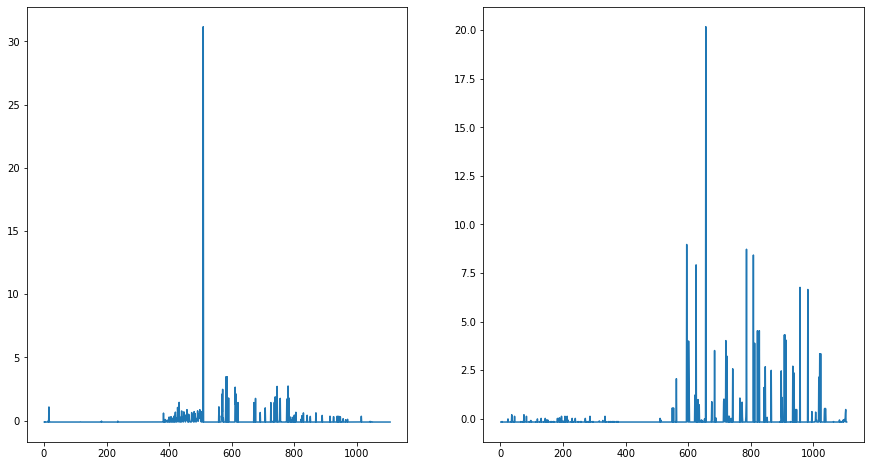

In [38]:
def Z_score(series):
    mean=np.mean(series)
    std=np.std(series)
    return series.map(lambda x:(x-mean)/std)
df_ch['ask_ch_z']=Z_score(df_ch['ask_ch'])
df_ch['bid_ch_z']=Z_score(df_ch['bid_ch'])
plt.figure(figsize=(15,8))
plt.subplot(1, 2, 1)
plt.plot(df_ch['ask_ch_z'])
plt.subplot(1, 2, 2)
plt.plot(df_ch['bid_ch_z'])

# 3设置阈值x_bar，并得到插针行情的统计量

### 网上找的simpson计算正态分布积分

In [46]:
def Normal_pdf(x):
    result = 1/math.sqrt(2*math.pi)*math.exp(-x*x/2)
    return result

#定义复合辛普森法求积分
def Simpson(func,a,b,eps=1e-10):
    '''
    :param func: 被积函数
    :param a: 积分下限
    :param b: 积分上限
    :param eps: 计算精度，默认为1e-10
    :return: 返回积分结果
    '''

    #定义一个字典，用来存储被积函数(x,f(x))，避免重复计算
    func_result_dict = {}

    def f(x):
        if func_result_dict.get(x) is None:
            r = func(x)
            func_result_dict[x] = r
        else:
            r = func_result_dict[x]
        return r

    #辛普森函数
    def Sn(a,b,n):
        '''
        :param a: 积分下限
        :param b: 积分上限
        :param n: 将区间[a,b]划为n等分
        :return: 返回积分结果
        '''
        sum_result = 0
        half_h = (b-a)/(2*n)
        for k in range(n):
            #k=0的时候，f(a+2kh)=f(a),后面需要再减去f(a)
            sum_result += 2*f(a+2*k*half_h)
            sum_result += 4 * f(a + (2 * k + 1) * half_h)
        sum_result = (sum_result+f(b)-f(a))*half_h/3
        return sum_result

    #依次计算S1,S2,S4,S8...当相邻的精度小于eps时退出循环，返回S4n的结果
    i = 1
    S2n = Sn(a,b,i)
    S4n = Sn(a,b,2*i)
    while abs(S4n-S2n) > eps:
        i += 1
        S2n = S4n
        S4n = Sn(a,b,2**i)
    return S4n

1.0000000000000002

### 筛选出出现概率小于1-x_bar的归一化插针，并求和

In [68]:
x_bar=0.95
def get_needle_value(x,series):
    series2=series.map(lambda x:Simpson(Normal_pdf,-40,x)-x_bar)  # -40可以近似看作负无穷
    return series[series2[series2>=0].index].sum()
ask_needle=get_needle_value(x_bar,df_ch['ask_ch_z'])
bid_needle=get_needle_value(x_bar,df_ch['bid_ch_z'])

In [69]:
(ask_needle,bid_needle)

(67.26743806809115, 143.29210234709313)